In [1]:
import pandas as pd
import numpy as np

Data Load

In [3]:
df=pd.read_csv('C:/Users/mpc27/End-to-End-Crop-Recommended-System/notebook/data.csv')
df.sample(10)

Unnamed: 0  Nitrogen  Phosphorus  Potassium  Temperature   Humidity  \
480          480        27          74         20    24.694877  59.966692   
1524        1524        29         144        204    22.433245  92.486677   
1124        1124        38          15         30    28.918620  48.139745   
191          191        91          55         15    18.093002  72.610242   
1884        1884         2          30         30    26.001751  94.799984   
1030        1030        93          91         47    27.847679  83.311108   
1490        1490        80          18         51    28.053807  91.817588   
2162        2162       118          40         35    26.350342  58.506502   
122          122        74          56         22    18.283622  66.659528   
352          352        35          69         23    16.787915  24.968818   

      pH_Value    Rainfall         Crop  Crop_Encoded  
480   5.859813   91.957924   PigeonPeas            18  
1524  5.800449  119.102519        Apple             0  
1124  5.075505   97.013316        Mango            12  
191   6.376651   78.961595        Maize            11  
1884  6.331052  209.540094      Coconut             4  
1030  6.101242  117.287891       Banana             1  
1490  6.706053   20.765821    Muskmelon            15  
2162  7.460175  121.558630       Coffee             5  
122   6.829199   80.975733        Maize            11  
352   5.578410   75.453280  KidneyBeans             9

In [ ]:
crop=[
    "Apple":0,
    "Banana":1,
    "Blackgram":2,
    "ChickPea":3,
    "Coconut":4,
    "Coffee":5,
    "Cotton":6,
    "Grapes":7,
    "Jute":8,
    "Kidneybeans":9,
    "Lentil":10,
    "Maize":11,
    "Mango":12,
    "MothBeans":13,
    "MungBean":14,
    "Muskmelon":15,
    "Orange":16,
    "Papaya":17,
    "PigeonPeas":18,
    "Pomegranate":19,
    "Rice":20,
    "Watermelon":21
]

In [37]:
df[df['Crop_Encoded']==22]['Crop']

Series([], Name: Crop, dtype: object)

In [4]:
df.sample(10)

Unnamed: 0  Nitrogen  Phosphorus  Potassium  Temperature   Humidity  \
1209        1209        17         134        204    39.040720  80.183933   
1345        1345       101          20         48    24.677416  82.754114   
758          758        34          60         16    31.357308  64.249921   
221          221        25          68         77    20.093406  15.112796   
1177        1177        40          16         35    31.893563  49.024501   
2170        2170       114          20         26    25.556567  62.670878   
774          774        29          76         15    28.541724  64.202015   
1965        1965       130          59         19    25.072787  82.502579   
399          399        22          60         24    18.782263  20.247683   
1728        1728        61          51         51    39.300500  94.161934   

      pH_Value    Rainfall         Crop  Crop_Encoded  
1209  6.499605   73.884670       Grapes             7  
1345  6.206247   57.057094   Watermelon            21  
758   7.322555   63.856689    Blackgram             2  
221   7.701446   85.749049     ChickPea             3  
1177  6.484152   89.593715        Mango            12  
2170  7.279057  193.586623       Coffee             5  
774   7.025608   69.688623    Blackgram             2  
1965  6.520404   93.510427       Cotton             6  
399   5.630665  104.257072  KidneyBeans             9  
1728  6.574678  120.951247       Papaya            17

EDA Analysis

In [ ]:
df.isnull().sum()

Nitrogen       0
Phosphorus     0
Potassium      0
Temperature    0
Humidity       0
pH_Value       0
Rainfall       0
Crop           0
crop_Encode    0
dtype: int64

In [ ]:
df['Crop'].value_counts()

Crop
Rice           100
Maize          100
Jute           100
Cotton         100
Coconut        100
Papaya         100
Orange         100
Apple          100
Muskmelon      100
Watermelon     100
Grapes         100
Mango          100
Banana         100
Pomegranate    100
Lentil         100
Blackgram      100
MungBean       100
MothBeans      100
PigeonPeas     100
KidneyBeans    100
ChickPea       100
Coffee         100
Name: count, dtype: int64

In [9]:
df['Crop'].value_counts()

Crop
Rice           100
Maize          100
ChickPea       100
KidneyBeans    100
PigeonPeas     100
MothBeans      100
MungBean       100
Blackgram      100
Lentil         100
Pomegranate    100
Banana         100
Mango          100
Grapes         100
Watermelon     100
Muskmelon      100
Apple          100
Orange         100
Papaya         100
Coconut        100
Cotton         100
Jute           100
Coffee         100
Name: count, dtype: int64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Nitrogen', ylabel='Density'>

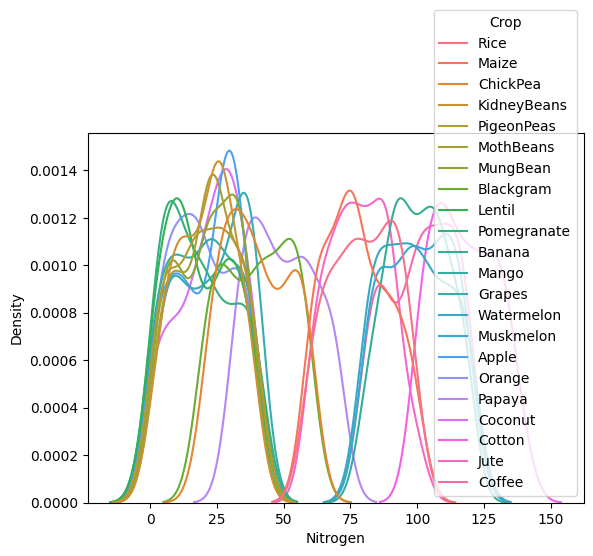

In [ ]:
sns.kdeplot(x='Nitrogen',data=df,hue='Crop')

<Axes: xlabel='Phosphorus', ylabel='Density'>

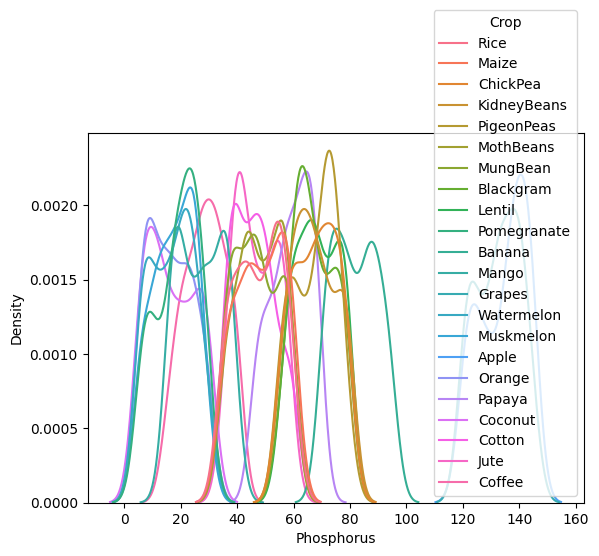

In [ ]:
sns.kdeplot(x='Phosphorus',data=df,hue='Crop')

<Axes: ylabel='Nitrogen'>

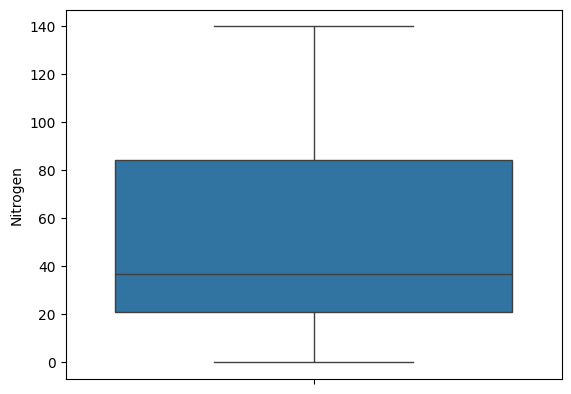

In [ ]:
sns.boxplot(df['Nitrogen'])

<Axes: ylabel='Phosphorus'>

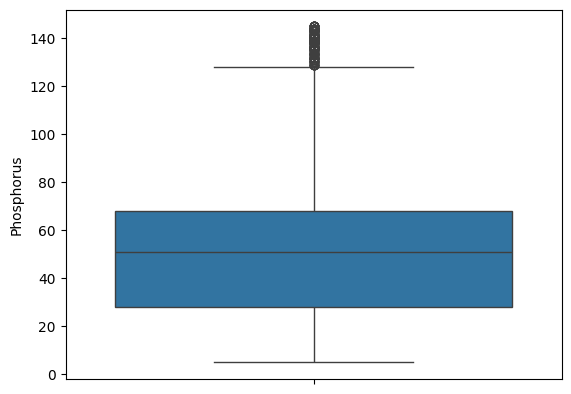

In [ ]:
sns.boxplot(df['Phosphorus'])

<Axes: ylabel='Potassium'>

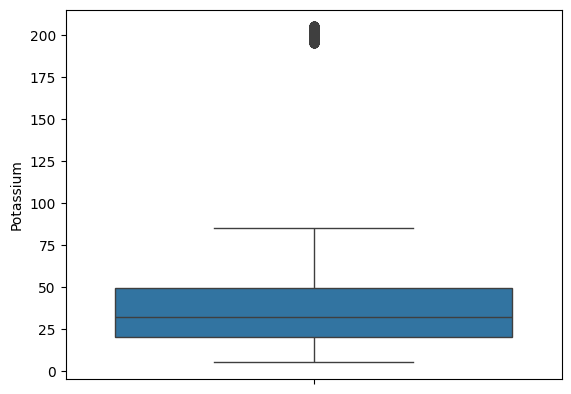

In [ ]:
sns.boxplot(df['Potassium'])

<Axes: ylabel='Temperature'>

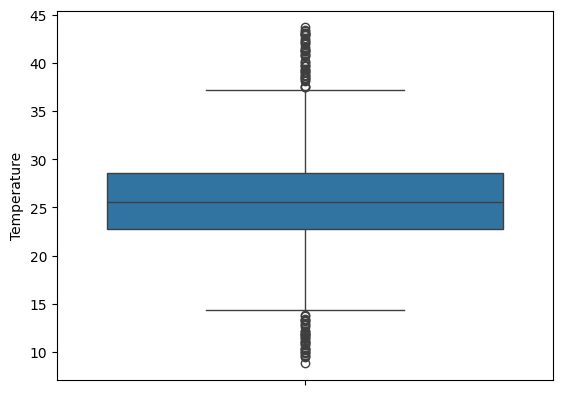

In [ ]:
sns.boxplot(df['Temperature'])

Data Preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['crop_Encode']=le.fit_transform(df['Crop'])

In [ ]:
X=df.iloc[:,:-2]
y=df.iloc[:,-1]

In [ ]:
y

0       20
1       20
2       20
3       20
4       20
        ..
2195     5
2196     5
2197     5
2198     5
2199     5
Name: crop_Encode, Length: 2200, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

Train The Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
from sklearn.metrics import accuracy_score
y_pred=rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.9931818181818182

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score
y_pred=lr.predict(X_test)
accuracy_score(y_test,y_pred)

0.9454545454545454

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
from sklearn.metrics import accuracy_score
y_pred=dt.predict(X_test)
accuracy_score(y_test,y_pred)

0.9863636363636363

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train_ft,y_train)

GaussianNB()

In [ ]:
from sklearn.metrics import accuracy_score
y_pred=nb.predict(X_test)
accuracy_score(y_test,y_pred)

0.9954545454545455

In [ ]:
import pickle
pickle.dump(nb,open('model.pkl','wb'))
pickle.dump(sc,open('scaler.pkl','wb'))


In [ ]:
pickle.dump(df,open('df.pkl','wb'))